<a href="https://colab.research.google.com/github/ttogle918/AI_practice/blob/main/%EC%9C%A0%EC%82%AC%EB%AC%B8%EC%9E%A5K%EA%B0%9C%EA%B5%AC%ED%95%98%EA%B8%B0/SBERT_%EB%B0%B0%EA%B7%B8%EB%A6%AC%EB%B7%B0_KMeans_KNN_umap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[예제 블로그(이걸 그대로 올려도 되려나...?)](https://woochan-autobiography.tistory.com/900#1.%20BERT%20:%20%EB%AC%B8%EC%9E%A5%EC%9D%98%20%EB%AC%B8%EB%A7%A5%EC%9D%84%20%EC%96%91%EB%B0%A9%ED%96%A5%EC%9C%BC%EB%A1%9C%20%EC%9D%B4%ED%95%B4%ED%95%B4%EC%84%9C%20%EC%88%AB%EC%9E%90%EC%9D%98%20%ED%98%95%ED%83%9C%EB%A1%9C%20%EB%B0%94%EA%BF%94%EC%A3%BC%EB%8A%94%20%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EB%AA%A8%EB%8D%B8)

In [ ]:
!pip install pytorch-transformers transformers
!pip install sentence-transformers datasets

In [ ]:
!pip install hdbscan
!pip install umap-learn

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('jhgan/ko-sroberta-multitask')

sentences = ["안녕하세요?", "한국어 문장 임베딩을 위한 버트 모델입니다."]
embeddings = model.encode(sentences)

print(embeddings)

[[-0.37510476 -0.77338415  0.5927711  ...  0.57923514  0.3268347
  -0.65089625]
 [-0.09361722 -0.18191545 -0.19230829 ... -0.03165793  0.3041255
  -0.26793614]]


In [ ]:
from sklearn.cluster import KMeans, DBSCAN

# Corpus with example sentences
sentences = ['한 남자가 음식을 먹는다.',
          '한 남자가 빵 한 조각을 먹는다.',
          '그 여자가 아이를 돌본다.',
          '한 남자가 말을 탄다.',
          '한 여자가 바이올린을 연주한다.',
          '두 남자가 수레를 숲 속으로 밀었다.',
          '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.',
          '원숭이 한 마리가 드럼을 연주한다.',
          '치타 한 마리가 먹이 뒤에서 달리고 있다.',
          '한 남자가 파스타를 먹는다.',
          '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.',
          '치타가 들판을 가로 질러 먹이를 쫓는다.']

embeddings = model.encode(sentences)

# Then, we perform k-means clustering using sklearn:
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(sentences[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['한 여자가 바이올린을 연주한다.', '원숭이 한 마리가 드럼을 연주한다.', '고릴라 의상을 입은 누군가가 드럼을 연주하고 있다.']

Cluster  2
['한 남자가 음식을 먹는다.', '한 남자가 빵 한 조각을 먹는다.', '한 남자가 파스타를 먹는다.']

Cluster  3
['치타 한 마리가 먹이 뒤에서 달리고 있다.', '치타가 들판을 가로 질러 먹이를 쫓는다.']

Cluster  4
['한 남자가 말을 탄다.', '두 남자가 수레를 숲 속으로 밀었다.', '한 남자가 담으로 싸인 땅에서 백마를 타고 있다.']

Cluster  5
['그 여자가 아이를 돌본다.']



In [ ]:
import torch
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("Huffon/sentence-klue-roberta-base")

docs = [
    "1992년 7월 8일 손흥민은 강원도 춘천시 후평동에서 아버지 손웅정과 어머니 길은자의 차남으로 태어나 그곳에서 자랐다.",
    "형은 손흥윤이다.",
    "춘천 부안초등학교를 졸업했고, 춘천 후평중학교에 입학한 후 2학년때 원주 육민관중학교 축구부에 들어가기 위해 전학하여 졸업하였으며, 2008년 당시 FC 서울의 U-18팀이었던 동북고등학교 축구부에서 선수 활동 중 대한축구협회 우수선수 해외유학 프로젝트에 선발되어 2008년 8월 독일 분데스리가의 함부르크 유소년팀에 입단하였다.",
    "함부르크 유스팀 주전 공격수로 2008년 6월 네덜란드에서 열린 4개국 경기에서 4게임에 출전, 3골을 터뜨렸다.",
    "1년간의 유학 후 2009년 8월 한국으로 돌아온 후 10월에 개막한 FIFA U-17 월드컵에 출전하여 3골을 터트리며 한국을 8강으로 이끌었다.",
    "그해 11월 함부르크의 정식 유소년팀 선수 계약을 체결하였으며 독일 U-19 리그 4경기 2골을 넣고 2군 리그에 출전을 시작했다.",
    "독일 U-19 리그에서 손흥민은 11경기 6골, 2부 리그에서는 6경기 1골을 넣으며 재능을 인정받아 2010년 6월 17세의 나이로 함부르크의 1군 팀 훈련에 참가, 프리시즌 활약으로 함부르크와 정식 계약을 한 후 10월 18세에 함부르크 1군 소속으로 독일 분데스리가에 데뷔하였다.",
]
document_embeddings = model.encode(docs)

query = "손흥민은 어린 나이에 유럽에 진출하였다."
query_embedding = model.encode(query)

top_k = min(5, len(docs))
cos_scores = util.pytorch_cos_sim(query_embedding, document_embeddings)[0]
top_results = torch.topk(cos_scores, k=top_k)

print(f"입력 문장: {query}")
print(f"<입력 문장과 유사한 {top_k} 개의 문장>")

for i, (score, idx) in enumerate(zip(top_results[0], top_results[1])):
    print(f"{i+1}: {docs[idx]} {'(유사도: {:.4f})'.format(score)}")

입력 문장: 손흥민은 어린 나이에 유럽에 진출하였다.
<입력 문장과 유사한 5 개의 문장>
1: 독일 U-19 리그에서 손흥민은 11경기 6골, 2부 리그에서는 6경기 1골을 넣으며 재능을 인정받아 2010년 6월 17세의 나이로 함부르크의 1군 팀 훈련에 참가, 프리시즌 활약으로 함부르크와 정식 계약을 한 후 10월 18세에 함부르크 1군 소속으로 독일 분데스리가에 데뷔하였다. (유사도: 0.5897)
2: 그해 11월 함부르크의 정식 유소년팀 선수 계약을 체결하였으며 독일 U-19 리그 4경기 2골을 넣고 2군 리그에 출전을 시작했다. (유사도: 0.4857)
3: 1992년 7월 8일 손흥민은 강원도 춘천시 후평동에서 아버지 손웅정과 어머니 길은자의 차남으로 태어나 그곳에서 자랐다. (유사도: 0.4047)
4: 함부르크 유스팀 주전 공격수로 2008년 6월 네덜란드에서 열린 4개국 경기에서 4게임에 출전, 3골을 터뜨렸다. (유사도: 0.3953)
5: 춘천 부안초등학교를 졸업했고, 춘천 후평중학교에 입학한 후 2학년때 원주 육민관중학교 축구부에 들어가기 위해 전학하여 졸업하였으며, 2008년 당시 FC 서울의 U-18팀이었던 동북고등학교 축구부에서 선수 활동 중 대한축구협회 우수선수 해외유학 프로젝트에 선발되어 2008년 8월 독일 분데스리가의 함부르크 유소년팀에 입단하였다. (유사도: 0.3183)


# 배틀그라운드 리뷰 크롤링

In [ ]:
import requests
import time

In [ ]:
def get_reviews(appid, params={'json':1}):
        url = 'https://store.steampowered.com/appreviews/'
        response = requests.get(url=url+str(appid), params=params, headers={'User-Agent': 'Mozilla/5.0'})
        return response.json()

def get_n_reviews(appid, n=100): # 어떤 게임, 몇개
    reviews = []
    cursor = '*'
    params = {
        'json' : 1,
        'filter' : 'all',
        'language' : 'koreana',
        'day_range' : 9223372036854775807, # 전체기간 리뷰
        'review_type' : 'all',
        'purchase_type' : 'all'
    }

    while n > 0:
        time.sleep(2) # 차단 당할 수 있기 때문에 2초간 쉬면서 받는다.
        params['cursor'] = cursor.encode()
        params['num_per_page'] = min(100, n)
        n -= 100

        response = get_reviews(appid, params)
        cursor = response['cursor']
        reviews += response['reviews']

        if len(response['reviews']) < 100: break

    return reviews

In [ ]:
reviews = get_n_reviews(578080, 10000)

reviews[:5]

[{'recommendationid': '105918619',
  'author': {'steamid': '76561198055912694',
   'num_games_owned': 168,
   'num_reviews': 6,
   'playtime_forever': 16699,
   'playtime_last_two_weeks': 0,
   'playtime_at_review': 16514,
   'last_played': 1648473763},
  'language': 'koreana',
  'review': '너 이게 무슨 뜻이야? 너는 지난번에 천안문도 잊지 않고 민주주의도 반드시 되찾겠다고 말했잖아.\n你这是什么意思？ 你上次不是说你不会忘记天安门而且必定找回民主主义吗。\n\n上次说要为香港示威加油的是什么？\n저번에 홍콩 시위를 응원한다고 말했던 건 뭐야?\n\n赞成维吾尔族人独立，欢迎啊。\n위구르인들의 독립에 찬성한다니 환영이야.\n\n习近平主席的母亲是蟑螂吗？\n시진핑 주석의 어머니는 바퀴벌레라고?\n\n我很佩服你支持维唔尔族的独立。\n위구르족의 독립을 지지하다니 놀라운걸?\n\n同志，暗杀习主席的阴谋进行得很顺利吗？\n동지, 시 주석 암살 모의는 잘 진행되고 있소?\n\n我会报告你给警察。\n당신을 중국 공안에 신고하겠다.',
  'timestamp_created': 1639659053,
  'timestamp_updated': 1648130679,
  'voted_up': True,
  'votes_up': 724,
  'votes_funny': 177,
  'weighted_vote_score': '0.947523593902587891',
  'comment_count': 13,
  'steam_purchase': True,
  'received_for_free': False,
  'written_during_early_access': False,
  'hidden_in_steam_china': False,
  'steam_china_location': ''

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(reviews)

df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,105918619,"{'steamid': '76561198055912694', 'num_games_ow...",koreana,너 이게 무슨 뜻이야? 너는 지난번에 천안문도 잊지 않고 민주주의도 반드시 되찾겠다...,1639659053,1648130679,True,724,177,0.947523593902587891,13,True,False,False,False,
1,45910331,"{'steamid': '76561198261798904', 'num_games_ow...",koreana,얼리억세스 당시 혁명이였다.\n배틀로얄 장르의 붐을 가져왔다.\n너도나도 구매하며 ...,1542703541,1542703541,False,601,133,0.947008073329925537,0,True,False,False,False,
2,35200384,"{'steamid': '76561198064573291', 'num_games_ow...",koreana,중국서버 좀 따로 만들어줘...,1506336853,1507025807,True,777,49,0.944858968257904053,90,True,False,True,False,
3,32554669,"{'steamid': '76561197960517648', 'num_games_ow...",koreana,"보이스 챗만 활성화 했다하면 ""타이완 넘버원"" 임",1497836598,1497836598,True,1143,384,0.938867866992950439,81,False,False,True,False,
4,34380445,"{'steamid': '76561198128131110', 'num_games_ow...",koreana,초반 슈퍼파밍 = 끔살\n초반 흙수저 인생 = 탑10,1503256616,1503256616,True,574,179,0.936959326267242432,72,True,False,True,False,


In [ ]:
df['review'] = df['review'].replace(r'[^가-힣 ]', ' ', regex=True).replace("'", '').replace(r'\s+', ' ', regex=True).str.strip().str[:255]

df.head()

,recommendationid,author,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,hidden_in_steam_china,steam_china_location
0,105918619,"{'steamid': '76561198055912694', 'num_games_ow...",koreana,너 이게 무슨 뜻이야 너는 지난번에 천안문도 잊지 않고 민주주의도 반드시 되찾겠다고...,1639659053,1648130679,True,724,177,0.947523593902587891,13,True,False,False,False,
1,45910331,"{'steamid': '76561198261798904', 'num_games_ow...",koreana,얼리억세스 당시 혁명이였다 배틀로얄 장르의 붐을 가져왔다 너도나도 구매하며 플레이했...,1542703541,1542703541,False,601,133,0.947008073329925537,0,True,False,False,False,
2,35200384,"{'steamid': '76561198064573291', 'num_games_ow...",koreana,중국서버 좀 따로 만들어줘,1506336853,1507025807,True,777,49,0.944858968257904053,90,True,False,True,False,
3,32554669,"{'steamid': '76561197960517648', 'num_games_ow...",koreana,보이스 챗만 활성화 했다하면 타이완 넘버원 임,1497836598,1497836598,True,1143,384,0.938867866992950439,81,False,False,True,False,
4,34380445,"{'steamid': '76561198128131110', 'num_games_ow...",koreana,초반 슈퍼파밍 끔살 초반 흙수저 인생 탑,1503256616,1503256616,True,574,179,0.936959326267242432,72,True,False,True,False,


In [ ]:
df = df[df['review'].str.strip().astype(bool)]

len(df)

8732

In [ ]:
df['review'].values.tolist()[:5]

['너 이게 무슨 뜻이야 너는 지난번에 천안문도 잊지 않고 민주주의도 반드시 되찾겠다고 말했잖아 저번에 홍콩 시위를 응원한다고 말했던 건 뭐야 위구르인들의 독립에 찬성한다니 환영이야 시진핑 주석의 어머니는 바퀴벌레라고 위구르족의 독립을 지지하다니 놀라운걸 동지 시 주석 암살 모의는 잘 진행되고 있소 당신을 중국 공안에 신고하겠다',
 '얼리억세스 당시 혁명이였다 배틀로얄 장르의 붐을 가져왔다 너도나도 구매하며 플레이했다 고사양의 필요사양은 진입장벽이 안되고 피시방의 기준이 되었다 정식 발매 핵은 만연했다 핵을 잡는다고 했다 스킨 랜덤박스를 냈다 카카오배그를 출시한다고 했다 거기엔 한국인만 있고 핵도 없다했다 카카오배그를 샀다 카카오배그에도 핵이 나타났다 핵을 잡는다고 했다 스킨 랜덤박스를 더 출시했다 왠 다른 게임 배틀로얄이 배그를 역전했다고 했다 유저수는 계속 줄어서 나누었던 서버를',
 '중국서버 좀 따로 만들어줘',
 '보이스 챗만 활성화 했다하면 타이완 넘버원 임',
 '초반 슈퍼파밍 끔살 초반 흙수저 인생 탑']

In [ ]:
# df.to_csv('battleground_steam_reviews_ko.csv', index=False)

# 배그 리뷰 임베딩

In [ ]:
corpus = df['review'].values.tolist()

embeddings = model.encode(corpus)

embeddings[:5]

array([[ 0.07272851, -0.25883391,  0.23159546, ...,  0.22200334,
        -0.02625249,  0.34145895],
       [-0.38167843,  0.02377767, -0.02881649, ...,  0.20410454,
        -0.36297446, -0.17355077],
       [-0.09592177, -0.5720186 ,  0.06228114, ..., -0.7443473 ,
        -0.0715225 ,  0.02934031],
       [ 0.46995318,  0.7277678 ,  0.22966804, ..., -0.11429353,
        -0.5324465 , -0.02249766],
       [-0.33299398,  0.09415938,  0.5657365 , ..., -0.14043817,
         0.18970083,  0.59626687]], dtype=float32)

# Clustering

In [ ]:
num_clusters = 8
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print('Cluster %d (%d)' % (i+1, len(cluster)))
    print(cluster)
    print('')

Cluster 1 (962)
['무료배포가 시작되면 핵쟁이의 세상이 시작될것이다', '핵좀 막아라', '핑핑아 니네나라 애들 핵좀 그만쓰게 해라', '핵이 너 무많음', '핵이 너무 많습니다', '핵좀 잡아라', '핵좀잡아주면딱좋은게임', '핵', '핵만 잡자', '핵만 없으면 갓겜', '핵쟁이 그냥 모집하는거 아닌가', '핵쟁이나 쳐 잡으세요', '핵존나 많아서 못해먹것다', '핵만 없으면 돼', '핵쟁이가 너무 많아 스트레스받고 초보자에게 진입장벽이 있음', '핵만 없으면', '핵쟁이아직도있냐', '핵이 인게임', '핵 문제가 너무 심각함', '핵만 없으면 참 좋은 게임', '핵좀잡고 중국좀 한국서버에 못오게 해주시고', '핑핑아 니네나라 애들 핵좀 그만쓰게 해라', '핵만잡자', '원 주고 이걸 사서 핵쟁이들이랑 겜할바에 그돈으로 진짜 치킨을 사드세요', '핵이 너무 많음', '핵이 너무많음', '핵쟁이들 길가다 사고나서 고자돼라', '핵쟁이 게임', '핵만 잡으면 진짜 갓겜', '핵유저만 해결하먼 갓게임인데', '핵 중국인 게임', '핵만 없다면 진짜 갓게임입니다', '핵좀 잡아라', '님들아 핵좀 그만 쓰세요', '핵이 너무 많다', '핵 쓴 놈들 아이피 밴을 때리던가 해서 핵 좀 줄이자 제발 내가 영구밴 시킨 핵만 명인데 그럼 핵이 얼마나 많다는거임 제발 핵좀 막아라 안 그럼 좆망겜 된다 이미 좆망겜이긴 하지만', '핵만 잡으면 갓겜', '핵쟁이들을 위한 게임', '핵쟁이 옹호겜 존나 빨리망해라 씨발', '제발 핵좀 잡아라 시밤바야', '핵많아서 게임하기 힘들어요', '핵개많음', '핵만 잡으면 개갓겜', '핵 잡는것만 잘하면 좋을것같아', '핵이 좀 줄긴했는데 지금 남은 한국인들이 핵만큼 잘하는 애들 밖에 없어서 그게 그거임', '핵유저좀 잡어줘요', '핵 만 아니면 재밌음', '핵이 너무 많음', '비정상적으로 많은 핵 유져', '핵만 잡으면 꿀잼게임', '핵만 없으면 좋을듯', '그지같은 최적화에 감동받고 핵쟁이에 또 감동받았다 암이 암으로 치

# 시도 : KNN

### 구현

In [ ]:
import numpy as np
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return np.sqrt(distance)

In [ ]:
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [ ]:
neighbors = get_neighbors(embeddings, embeddings[0], 10)
print(corpus[0])
for i, neighbor in enumerate(neighbors):
	print(i, corpus[i])

너 이게 무슨 뜻이야 너는 지난번에 천안문도 잊지 않고 민주주의도 반드시 되찾겠다고 말했잖아 저번에 홍콩 시위를 응원한다고 말했던 건 뭐야 위구르인들의 독립에 찬성한다니 환영이야 시진핑 주석의 어머니는 바퀴벌레라고 위구르족의 독립을 지지하다니 놀라운걸 동지 시 주석 암살 모의는 잘 진행되고 있소 당신을 중국 공안에 신고하겠다
0 너 이게 무슨 뜻이야 너는 지난번에 천안문도 잊지 않고 민주주의도 반드시 되찾겠다고 말했잖아 저번에 홍콩 시위를 응원한다고 말했던 건 뭐야 위구르인들의 독립에 찬성한다니 환영이야 시진핑 주석의 어머니는 바퀴벌레라고 위구르족의 독립을 지지하다니 놀라운걸 동지 시 주석 암살 모의는 잘 진행되고 있소 당신을 중국 공안에 신고하겠다
1 얼리억세스 당시 혁명이였다 배틀로얄 장르의 붐을 가져왔다 너도나도 구매하며 플레이했다 고사양의 필요사양은 진입장벽이 안되고 피시방의 기준이 되었다 정식 발매 핵은 만연했다 핵을 잡는다고 했다 스킨 랜덤박스를 냈다 카카오배그를 출시한다고 했다 거기엔 한국인만 있고 핵도 없다했다 카카오배그를 샀다 카카오배그에도 핵이 나타났다 핵을 잡는다고 했다 스킨 랜덤박스를 더 출시했다 왠 다른 게임 배틀로얄이 배그를 역전했다고 했다 유저수는 계속 줄어서 나누었던 서버를
2 중국서버 좀 따로 만들어줘
3 보이스 챗만 활성화 했다하면 타이완 넘버원 임
4 초반 슈퍼파밍 끔살 초반 흙수저 인생 탑
5 흠흠 세일도 안하길래 걍 사서 해봤는데 무슨 시간 역행이랑 렉좀 줄이면 갓겜일듯 싶다 굳굳
6 중국서버 분리하고 중국인은 중국서버 밖으로 못나오게 해라
7 스킨 만들시간에 서버관리부터 좀 해주세요 스킨 만들시간에 서버관리부터 좀 해주세요 스킨 만들시간에 서버관리부터 좀 해주세요 스킨 만들시간에 서버관리부터 좀 해주세요 스킨 만들시간에 서버관리부터 좀 해주세요 스킨 만들시간에 서버관리부터 좀 해주세요 스킨 만들시간에 서버관리부터 좀 해주세요 스킨 만들시간에 서버관리부터 좀 해주세요 스킨 만들시간에 서버관리부터 좀 해주세요 스킨 만들시간에

In [ ]:
len(clustered_sentences)

In [ ]:
text = corpus[0]
for i in range(len(clustered_sentences)):
  if text in clustered_sentences[i] :
    cluster_number = i
print(cluster_number)

3


In [ ]:
ssum = 0
for t in neighbors :
  if t in clustered_sentences[cluster_number] :
    print(t)
    ssum += 1

print(ssum)

0


<ipython-input-94-74f9e6552072>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if t in clustered_sentences[cluster_number] :


In [ ]:
embeddings.shape

(8732, 768)

In [ ]:
corpus[0]

'너 이게 무슨 뜻이야 너는 지난번에 천안문도 잊지 않고 민주주의도 반드시 되찾겠다고 말했잖아 저번에 홍콩 시위를 응원한다고 말했던 건 뭐야 위구르인들의 독립에 찬성한다니 환영이야 시진핑 주석의 어머니는 바퀴벌레라고 위구르족의 독립을 지지하다니 놀라운걸 동지 시 주석 암살 모의는 잘 진행되고 있소 당신을 중국 공안에 신고하겠다'

### 패키지 사용 KNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

knn_model = NearestNeighbors(n_neighbors=10, radius=0.4, algorithm='auto')
knn_model.fit(embeddings[:-1])

dist, index = knn_model.kneighbors([embeddings[3]], 10, return_distance=True)   # distance, index

In [ ]:
index

array([[   3, 7026,  758, 8487, 8594, 8122, 5160,  595, 2706, 1867]])

In [ ]:
print('test 문장 : ', corpus[3])
for i in index[0] :
  print(corpus[i])

test 문장 :  보이스 챗만 활성화 했다하면 타이완 넘버원 임
보이스 챗만 활성화 했다하면 타이완 넘버원 임
타이완 넘버원
타이완 넘버원
타이완 넘버원 밖에안들림
한국인은 모두 그 단어를 외치게 되는 게임 타이완 넘버원
타이완 남바완
중국인 좀 따로 격리시켜주세요 타이완 넘버원들
아는 형이랑 한 판하다가 생긴 일 준비 시간에 중국인한테 타이완 넘버 원 했다가 욕 들음 땅에 도착하자 마자 주먹으로 포아너를 찍음 차를 주차시켰다가 당함 자기장 속도가 점점 빨라지는걸 모르고 캠핑하다가 죽을뻔 함 자기장에서 빠져나간 뒤 바위 뒤에서 한숨 돌리다 머리에 피어싱 당함 갓 겜 추가 얼리 엑세스 때는 이렇게 뇌 비우고 해도 재밌더니 어떻게 바뀐 게 하나도 없냐 배틀로얄이라 모든 사람이 실력별로 매칭 안되는 건 이해하지만 이건 도를 넘었지 핵쟁
스쿼드 듀요 솔로 순으로 하면서 실력을 키워왔다 근데 중국인 너무 많이 만났고 겁나 잘하는 중국인 영어 잘하는 중국인 그냥 중국인을 만났다 나야 어디 국적이든 가리지 않지만 팀킬하는 중국인 정말 싫다 팀킬하는 중국인을 만날빠에는 의사소통 않되는 중국인 더 낫다 아 참고로 배린이들은 무조건 학교로 찾아가라 개속 죽고죽고죽다보면 어느세 너가 상대방을 죽이고 짱 먹을 것이다 본인도 그렇게 실력 키움
재밌다 얼리 엑세스라 부족한건 특히 최적화 감수 할 수 있지만 서버관리는 좀더 신경 쓰셔야 할 듯 그리고 중국인들 격리좀 시키면 좋겠음 짱깨랑 루스키 새끼들이랑은 더 이상 겜 하기 싫음 부터 안 함 그 떄 기준으로 수정 그때 당시만해도 핵쟁이는 둘째 게임시스템이 이러니 유저들을 욕 할 수는 없지만 인칭 모드에서 존버맨들 너무많아 노잼화됨 그래서 한동안 인칭 했지만 컨텐츠가 너무 딸렸음 아예 안 하니 어떻게 변한지는 알 수 없지만 다시 하라해도 안 할것 


### umap으로 차원축소 후 KNN

In [ ]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine').fit_transform(embeddings)

In [ ]:
umap_embeddings.shape

(8732, 5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

umap_knn_model = NearestNeighbors(n_neighbors=10, radius=0.4, algorithm='auto')
umap_knn_model.fit(umap_embeddings[:-1])

dist, index = umap_knn_model.kneighbors([umap_embeddings[-1]], 10, return_distance=True)   # distance, index

print('test 문장 : ', corpus[-1])
for i in index[0] :
  print(corpus[i])

test 문장 :  띠용
띤
따봉
옹
따봉
따봉
땅봉
네
네
조아연
구현우엄마


In [ ]:
dist, index = umap_knn_model.kneighbors([umap_embeddings[3]], 10, return_distance=True)   # distance, index

print('test 문장 : ', corpus[3])
for i in index[0] :
  print(corpus[i])

test 문장 :  보이스 챗만 활성화 했다하면 타이완 넘버원 임
보이스 챗만 활성화 했다하면 타이완 넘버원 임
타이완 넘버원
타이완 넘버원 밖에안들림
한국인은 모두 그 단어를 외치게 되는 게임 타이완 넘버원
타이완 넘버원
타이완 남바완
코리아 넘버원
코리아 남바 완
따이완 남바완
섹


# word cloud 제작

In [ ]:
!pip install -q konlpy tqdm

     |████████████████████████████████| 19.4 MB 582 kB/s 
     |████████████████████████████████| 465 kB 56.5 MB/s 


In [ ]:
from konlpy.tag import Komoran, Okt, Kkma, Hannanum
from tqdm import tqdm

extractor = Hannanum()

nouns = [] # 명사만 추출해라

for review in tqdm(df['review'].values.tolist()):
    nouns.extend(extractor.nouns(review))

len(nouns)

100%|██████████| 8732/8732 [00:45<00:00, 193.66it/s]


64198

In [ ]:
from collections import Counter

count = Counter(nouns)
words = dict(count.most_common())

for i, (word, count) in enumerate(words.items()):
    if i > 10:
        break

    print(word, count)

게임 2639
핵 1908
것 973
서버 701
배그 563
진짜 524
수 508
갓겜 502
최적화 481
이 479
나 420


In [ ]:
!wget https://github.com/kairess/MBTI-wordcloud/raw/master/NanumSquareRoundR.ttf

--2022-12-08 05:01:58--  https://github.com/kairess/MBTI-wordcloud/raw/master/NanumSquareRoundR.ttf
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kairess/MBTI-wordcloud/master/NanumSquareRoundR.ttf [following]
--2022-12-08 05:01:59--  https://raw.githubusercontent.com/kairess/MBTI-wordcloud/master/NanumSquareRoundR.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1063276 (1.0M) [application/octet-stream]
Saving to: ‘NanumSquareRoundR.ttf’

NanumSquareRoundR.t 100%[===================>]   1.01M  --.-KB/s    in 0.006s  

2022-12-08 05:02:00 (162 MB/s) - ‘NanumSquareRoundR.ttf’ saved [1063

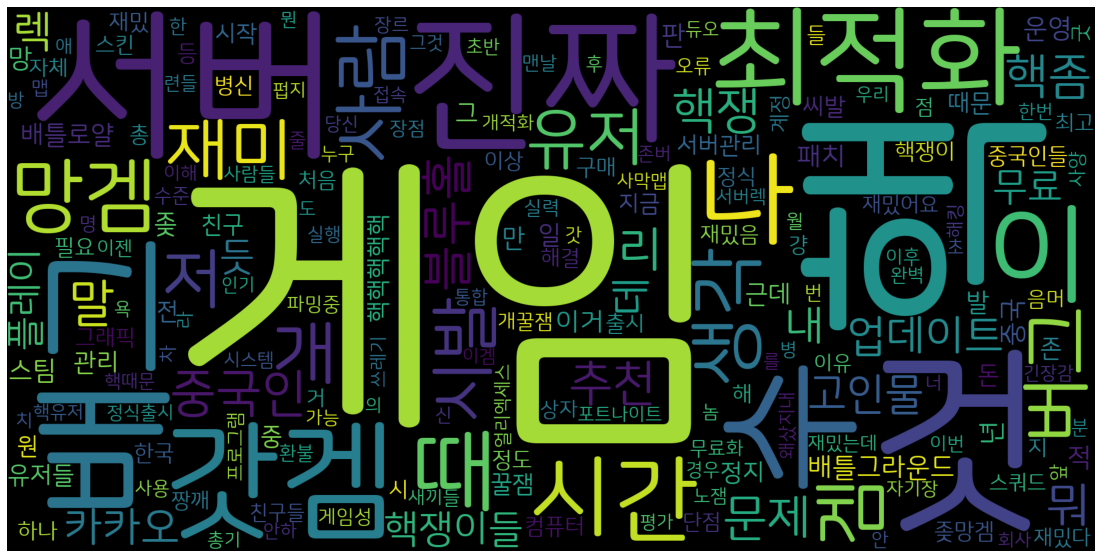

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(
    font_path='NanumSquareRoundR.ttf',
    width=2000,
    height=1000
).generate_from_frequencies(words)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()